# Read Data from a Viasala WXT536

In [1]:
import sage_data_client
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.dates import DateFormatter

----

<img src="images/Viasala_WXT536.jpeg" width=250 alt="Viasala_WXT536"></img>

## Overview


The Viasala WXT536 is an multi-parameter weather sensor that measures atmospheric temperatures, pressure, humdity, wind speed and direction, and precipitation. 

High quality atmospheric observations allow for understanding of the environmental conditions at the location of the instrument, and allow us to estimate transport of gas and particles through the atmosphere. 

In combination with additional sensors attached to a CROCUS Level 1 Node, we are then able to evaluate the concentration of pollutants at the node, the transport of these pollutants into and out of the area of the node, and estimate removal of these pollutants from the atmosphere from preciptiation. 


## Prerequisites

All WXT-536s are installed into a Waggle Edge Computing server as apart of CROCUS's Level 1 Nodes. 

The Waggle Edge Computing server allows for real-time modification of sensors parameters and dynamical modification of data through edge processing codes.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Waggle Sensors](https://github.com/waggle-sensor) | Helpful | Familiarity with Waggle Sensors|
| [Waggle/Sage Data Client](https://github.com/sagecontinuum/sage-data-client) | Necessary | Accessing Data |
| [Working with Pandas Dataframes](https://foundations.projectpythia.org/core/pandas.html) | Necessary | Understanding Data Object
| [Atmospheric Community Toolkit](https://arm-doe.github.io/ACT/) | Helpful | Visualizing the Data |

- **Time to Learn**: 60 minutes

## Interact with WXT-536 Data

We will be accessing data from a CROCUS Level 1 Node (W057), which is located at the Argonne Testbed for Multiscale Observational Science (ATMOS)

<img src="images/CROCUS_Level1_Node_WXT.jpeg" width=250 alt="CROCUS Level 1 Node (W057)"></img>

ATMOS serves as a long term observational site and allows for testing equipment before deployment across the CROCUS domain

Please check the [Waggle Node 57 User Interface](https://portal.sagecontinuum.org/node/000048B02D3AE336) to determine if the *vaisala-wxt536* plugin is working

To Query data from a Waggle Sensor, we will need:
1. Start of time period we are interested in (YYYY-MM-DDTHH:MM:SSZ format)
1. End of time period we are interested in (YYYY-MM-DDTHH:MM:SSZ format)
1. Plugin Name (e.g. waggle-wxt536)
1. Waggle Node Number (e.g. W057)
1. Sensor Name (e.g. 'vaisala-wxt536')

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    If you are only interested in a specific measurement,
    you can also query specific variables using the 'name' filter
</div>

In [2]:
# Query the SAGE data client to access the data
# Note: We need to know the time period we are interested in
df = sage_data_client.query(start="2023-04-10T12:00:00Z",
                            end="2023-04-10T15:00:00Z", 
                            filter={
                                "plugin": "10.31.81.1:5000/local/waggle-wxt536",
                                "vsn": "W057",
                                "sensor": "vaisala-wxt536"
                            }
)

In [3]:
df

,timestamp,name,value,meta.host,meta.job,meta.missing,meta.node,meta.plugin,meta.sensor,meta.task,meta.units,meta.vsn,meta.zone
0,2023-04-10 12:00:00.030623851+00:00,wxt.env.humidity,48.8,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,percent,W057,core
1,2023-04-10 12:00:00.110927910+00:00,wxt.env.humidity,48.8,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,percent,W057,core
2,2023-04-10 12:00:00.185660209+00:00,wxt.env.humidity,48.8,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,percent,W057,core
3,2023-04-10 12:00:00.259648308+00:00,wxt.env.humidity,48.8,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,percent,W057,core
4,2023-04-10 12:00:00.339504875+00:00,wxt.env.humidity,48.8,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,percent,W057,core
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137835,2023-04-10 14:59:59.686477504+00:00,wxt.wind.speed,3.2,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,meters per second,W057,core
1137836,2023-04-10 14:59:59.768390286+00:00,wxt.wind.speed,3.3,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,meters per second,W057,core
1137837,2023-04-10 14:59:59.842427079+00:00,wxt.wind.speed,3.3,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,meters per second,W057,core
1137838,2023-04-10 14:59:59.916735651+00:00,wxt.wind.speed,3.3,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,meters per second,W057,core


In [4]:
# Detemine the number of rows within the dataset
df.index

RangeIndex(start=0, stop=1137840, step=1)

In [5]:
# Determine number of columns within dataset
df.columns

Index(['timestamp', 'name', 'value', 'meta.host', 'meta.job', 'meta.missing',
       'meta.node', 'meta.plugin', 'meta.sensor', 'meta.task', 'meta.units',
       'meta.vsn', 'meta.zone'],
      dtype='object')

In [6]:
# Determine the number of unique measurements within 'name' column
print(set(df['name']))

{'wxt.env.pressure', 'wxt.env.temp', 'wxt.env.humidity', 'wxt.wind.speed', 'wxt.rain.accumulation', 'wxt.heater.volt', 'wxt.heater.temp', 'wxt.wind.direction'}


<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Data will only be returned for valid dates. Otherwise, dataframe object will contain nothing
</div>

In [7]:
# Query the SAGE data client to access the data
# Note: We need to know the time period we are interested in
no_data_df = sage_data_client.query(start="2099-04-10T12:00:00Z",
                                    end="2099-04-10T15:00:00Z", 
                                    filter={
                                        "plugin": "10.31.81.1:5000/local/waggle-wxt536",
                                        "vsn": "W057",
                                        "sensor": "vaisala-wxt536"
                                    }
)

In [8]:
no_data_df

,timestamp,name,value


## Investigate the Dataset

To investigate the dataset, it is helpful to know how to access specific rows or columns within the data

We will then display the ambient temperature of the dataset, in coordination with wind speed and direction

In [9]:
# isolate the environmental temperature data
df.loc[df['name'] == 'wxt.env.temp']

,timestamp,name,value,meta.host,meta.job,meta.missing,meta.node,meta.plugin,meta.sensor,meta.task,meta.units,meta.vsn,meta.zone
284460,2023-04-10 12:00:00.030623851+00:00,wxt.env.temp,8.4,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
284461,2023-04-10 12:00:00.110927910+00:00,wxt.env.temp,8.4,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
284462,2023-04-10 12:00:00.185660209+00:00,wxt.env.temp,8.4,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
284463,2023-04-10 12:00:00.259648308+00:00,wxt.env.temp,8.4,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
284464,2023-04-10 12:00:00.339504875+00:00,wxt.env.temp,8.4,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426685,2023-04-10 14:59:59.686477504+00:00,wxt.env.temp,15.5,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
426686,2023-04-10 14:59:59.768390286+00:00,wxt.env.temp,15.5,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
426687,2023-04-10 14:59:59.842427079+00:00,wxt.env.temp,15.5,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
426688,2023-04-10 14:59:59.916735651+00:00,wxt.env.temp,15.5,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core


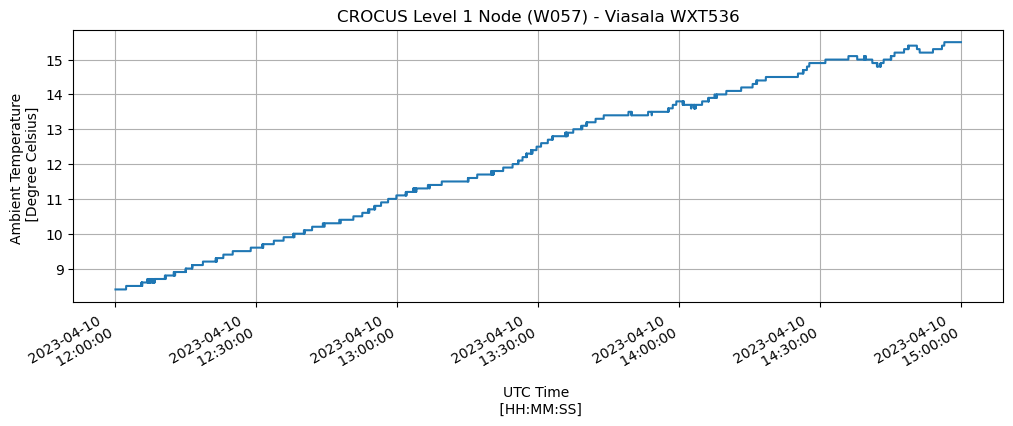

In [10]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
df.loc[df['name'] == 'wxt.env.temp'].set_index('timestamp').value.plot(
                                           xlabel='UTC Time \n [HH:MM:SS]',
                                           ylabel='Ambient Temperature \n [Degree Celsius]',
                                           title='CROCUS Level 1 Node (W057) - Viasala WXT536',
                                           ax=axs
                                          )

axs.xaxis.set_major_formatter(date_form)
axs.grid(True)

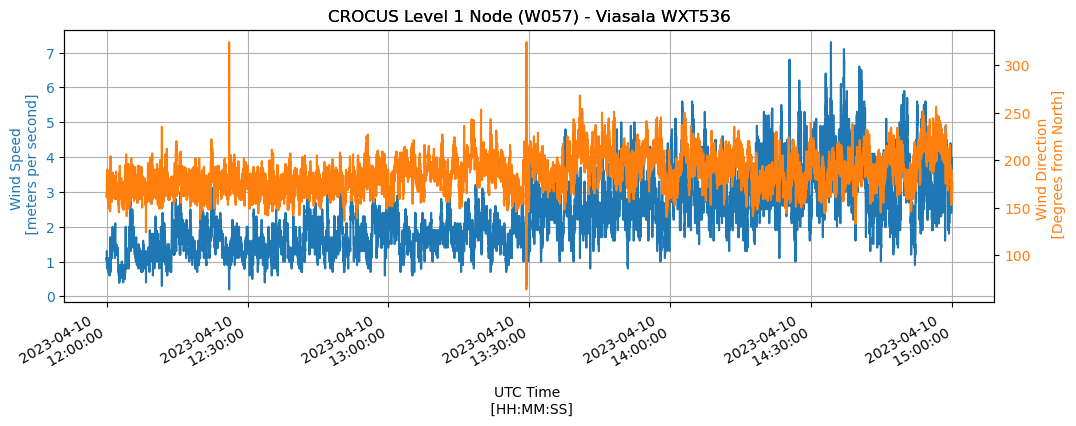

In [11]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
df.loc[df['name'] == 'wxt.wind.speed'].set_index('timestamp').value.plot(
                                           xlabel='UTC Time \n [HH:MM:SS]',
                                           ylabel='Wind Speed \n [meters per second]',
                                           title='CROCUS Level 1 Node (W057) - Viasala WXT536',
                                           ax=axs,
                                           color='C0'
                                          )
axs.set_ylabel('Wind Speed \n [meters per second]', 
               color='C0',
               )
axs.tick_params(axis='y', labelcolor='C0')

ax2 = axs.twinx()  # instantiate a second axes that shares the same x-axis

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
df.loc[df['name'] == 'wxt.wind.direction'].set_index('timestamp').value.plot(
                                                xlabel='UTC Time \n [HH:MM:SS]',
                                                title='CROCUS Level 1 Node (W057) - Viasala WXT536',
                                                ax=ax2,
                                                color='C1'
                                               )
ax2.set_ylabel('Wind Direction \n [Degrees from North]', 
               color='C1',
               )
ax2.tick_params(axis='y', labelcolor='C1')

axs.xaxis.set_major_formatter(date_form)
axs.grid(True)

## Display Diurnal Temperature Cycle 

Let's Grab all temperature data available to visualize the daily cycle

In [12]:
# Query the SAGE data client to access the data; use 'name' filter

df_temp = sage_data_client.query(start="2023-04-08T00:00:00Z",
                                 end="2023-04-10T23:00:00Z", 
                                    filter={
                                        "name" : 'wxt.env.temp',
                                        "plugin" : "10.31.81.1:5000/local/waggle-wxt536",
                                        "vsn" : "W057",
                                        "sensor" : "vaisala-wxt536"
                                    }
)

In [13]:
df_temp

,timestamp,name,value,meta.host,meta.job,meta.missing,meta.node,meta.plugin,meta.sensor,meta.task,meta.units,meta.vsn,meta.zone
0,2023-04-08 00:00:00.013659501+00:00,wxt.env.temp,7.2,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
1,2023-04-08 00:00:00.087358651+00:00,wxt.env.temp,7.2,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
2,2023-04-08 00:00:00.169489097+00:00,wxt.env.temp,7.2,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
3,2023-04-08 00:00:00.248497386+00:00,wxt.env.temp,7.2,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
4,2023-04-08 00:00:00.323739518+00:00,wxt.env.temp,7.2,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366103,2023-04-10 22:59:59.692888977+00:00,wxt.env.temp,21.1,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
3366104,2023-04-10 22:59:59.766486937+00:00,wxt.env.temp,21.1,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
3366105,2023-04-10 22:59:59.846693635+00:00,wxt.env.temp,21.1,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core
3366106,2023-04-10 22:59:59.920353227+00:00,wxt.env.temp,21.1,000048b02d3ae336.ws-nxcore,Pluginctl,-9999.9,000048b02d3ae336,10.31.81.1:5000/local/waggle-wxt536,vaisala-wxt536,wxt-536,degree Celsius,W057,core


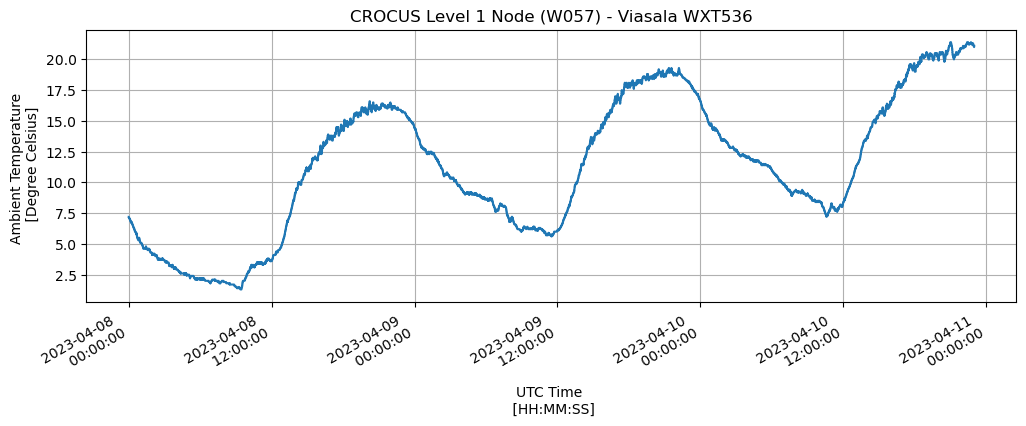

In [14]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
df_temp.set_index('timestamp').value.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Viasala WXT536',
                                          ax=axs
                                          )

axs.xaxis.set_major_formatter(date_form)
axs.grid(True)